#### Sources : 
- https://jackmckew.dev/sentiment-analysis-text-cleaning-in-python-with-vader.html
- https://towardsdatascience.com/social-media-sentiment-analysis-in-python-with-vader-no-training-required-4bc6a21e87b8#:~:text=compound%20corresponds%20to%20the%20sum,(most%20extreme%20positive%20sentiment).

### Older Approach

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 

plt.style.use('ggplot')

import nltk
import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abilfad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/abilfad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import random
random.seed(42)

In [3]:
### Read data
df = pd.read_csv('../sentiment-analysis/data/Reviews.csv')
print(df.shape)
df = df.sample(500)
print(df.shape)

(568454, 10)
(500, 10)


In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
508971,508972,B003SBU09Y,A2LAKVDDQYFYUA,Ryan M Connelly,2,2,5,1300838400,Awesome Replacement to Iced Coffee.,I have been purchasing Large French Vanilla Ic...
525373,525374,B001QY0SLU,A2EJ5XF26GV2F4,J Welch,1,1,4,1290902400,Very good,"I don't like homemade rum cakes, they have too..."
494339,494340,B004OQBC8K,A3QLP6M4RIT77H,Snow Bound,1,1,5,1267228800,I'm in LOVE with this tea!,It is sinfully delicious and a nice way to end...
271685,271686,B003CSUHXC,A233ZW18YNI3X5,"Barry Knudsen ""Just another Average Joe""",3,3,5,1297641600,These Wonderful-brand pistachios are truly won...,Although I haven't yet purchased Wonderful-bra...
351853,351854,B003TDV3II,A36J3H8L314Y5V,jenny spam,0,0,5,1321833600,It makes my 2 year old runt Maltese filled out...,I have my pup at 8 month old and she stroke fo...


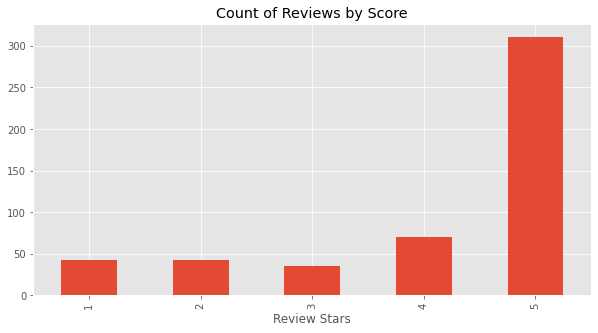

In [5]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Score',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

### Vader Sentiment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
- Stop words are removed
- each word is scored and combined to a total score.

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [7]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text='I am so happy!')

{'neg': 0.0, 'neu': 0.373, 'pos': 0.627, 'compound': 0.7213}

In [8]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = dict(sia.polarity_scores(text))

  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
res

{508972: {'neg': 0.057, 'neu': 0.85, 'pos': 0.093, 'compound': 0.9136},
 525374: {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.5559},
 494340: {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.5905},
 271686: {'neg': 0.066, 'neu': 0.83, 'pos': 0.104, 'compound': 0.5075},
 351854: {'neg': 0.041, 'neu': 0.79, 'pos': 0.169, 'compound': 0.9691},
 137235: {'neg': 0.042, 'neu': 0.657, 'pos': 0.301, 'compound': 0.9565},
 90712: {'neg': 0.041, 'neu': 0.789, 'pos': 0.17, 'compound': 0.8847},
 445899: {'neg': 0.045, 'neu': 0.898, 'pos': 0.057, 'compound': 0.3031},
 276382: {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.9963},
 167096: {'neg': 0.117, 'neu': 0.742, 'pos': 0.14, 'compound': 0.2748},
 494642: {'neg': 0.034, 'neu': 0.77, 'pos': 0.196, 'compound': 0.9883},
 197657: {'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.717},
 289692: {'neg': 0.079, 'neu': 0.795, 'pos': 0.126, 'compound': 0.8211},
 332944: {'neg': 0.048, 'neu': 0.721, 'pos': 0.231, 'compound': 0.92

In [10]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,508972,0.057,0.850,0.093,0.9136,B003SBU09Y,A2LAKVDDQYFYUA,Ryan M Connelly,2,2,5,1300838400,Awesome Replacement to Iced Coffee.,I have been purchasing Large French Vanilla Ic...
1,525374,0.091,0.909,0.000,-0.5559,B001QY0SLU,A2EJ5XF26GV2F4,J Welch,1,1,4,1290902400,Very good,"I don't like homemade rum cakes, they have too..."
2,494340,0.000,0.779,0.221,0.5905,B004OQBC8K,A3QLP6M4RIT77H,Snow Bound,1,1,5,1267228800,I'm in LOVE with this tea!,It is sinfully delicious and a nice way to end...
3,271686,0.066,0.830,0.104,0.5075,B003CSUHXC,A233ZW18YNI3X5,"Barry Knudsen ""Just another Average Joe""",3,3,5,1297641600,These Wonderful-brand pistachios are truly won...,Although I haven't yet purchased Wonderful-bra...
4,351854,0.041,0.790,0.169,0.9691,B003TDV3II,A36J3H8L314Y5V,jenny spam,0,0,5,1321833600,It makes my 2 year old runt Maltese filled out...,I have my pup at 8 month old and she stroke fo...


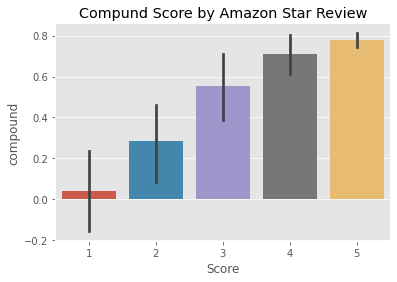

In [11]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

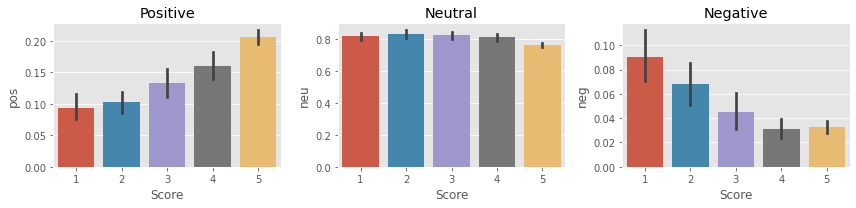

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Roberta

In [13]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [14]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [15]:
# VADER results on example
example = df['Text'].iloc[-1]
print(example)
sia.polarity_scores(example)


We definitely enjoy Teddy Grahams in our house and for the most part these were good. The only issue I had was that the taste of the chocolate ones were a bit off, maybe a bit stale tasting. Otherwise these are a great, easy and convenient product.


{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.9413}

In [16]:

# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.01039278, 'roberta_neu': 0.039328393, 'roberta_pos': 0.9502788}


In [17]:
## Function
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [18]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 124957
Broke for id 454910
Broke for id 494341
Broke for id 157371
Broke for id 423830
Broke for id 63402
Broke for id 24586
Broke for id 58231


In [19]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,508972,0.057,0.850,0.093,0.9136,0.148610,0.307094,0.544295,B003SBU09Y,A2LAKVDDQYFYUA,Ryan M Connelly,2,2,5,1300838400,Awesome Replacement to Iced Coffee.,I have been purchasing Large French Vanilla Ic...
1,525374,0.091,0.909,0.000,-0.5559,0.863076,0.120021,0.016903,B001QY0SLU,A2EJ5XF26GV2F4,J Welch,1,1,4,1290902400,Very good,"I don't like homemade rum cakes, they have too..."
2,494340,0.000,0.779,0.221,0.5905,0.003829,0.012119,0.984052,B004OQBC8K,A3QLP6M4RIT77H,Snow Bound,1,1,5,1267228800,I'm in LOVE with this tea!,It is sinfully delicious and a nice way to end...
3,271686,0.066,0.830,0.104,0.5075,0.014087,0.088812,0.897101,B003CSUHXC,A233ZW18YNI3X5,"Barry Knudsen ""Just another Average Joe""",3,3,5,1297641600,These Wonderful-brand pistachios are truly won...,Although I haven't yet purchased Wonderful-bra...
4,351854,0.041,0.790,0.169,0.9691,0.014435,0.072945,0.912619,B003TDV3II,A36J3H8L314Y5V,jenny spam,0,0,5,1321833600,It makes my 2 year old runt Maltese filled out...,I have my pup at 8 month old and she stroke fo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,424629,0.036,0.818,0.146,0.9536,0.088866,0.258230,0.652904,B002HFPW6I,AKHZU1TWMWEJV,Kelly Simon,0,0,4,1334534400,I love these bars...,I love the Trio bars. I personally LIKE that ...
488,59800,0.000,0.718,0.282,0.8248,0.320771,0.448371,0.230858,B000LKTD84,A1BGZYFRB1GF0I,"F. Tay ""crunchy college student""",0,0,3,1328832000,Too bitter for dark chocolate lover,I enjoy full-bodied chocolate so I thought I'd...
489,353569,0.027,0.725,0.248,0.8679,0.006534,0.025651,0.967814,B000UVBYRM,A2KM58XHVRT4YQ,Charles Ojeda,0,0,5,1315094400,Post workout treats,I love these bars after a workout. When I don...
490,47851,0.045,0.955,0.000,-0.4767,0.708303,0.235572,0.056125,B004SRH2B6,A2552G2MTZSLXC,Matt Matt,1,1,2,1291852800,"Zico NOT SO ""premium"" 14oz","Taste is ok,reminds of the milk leftover in th..."


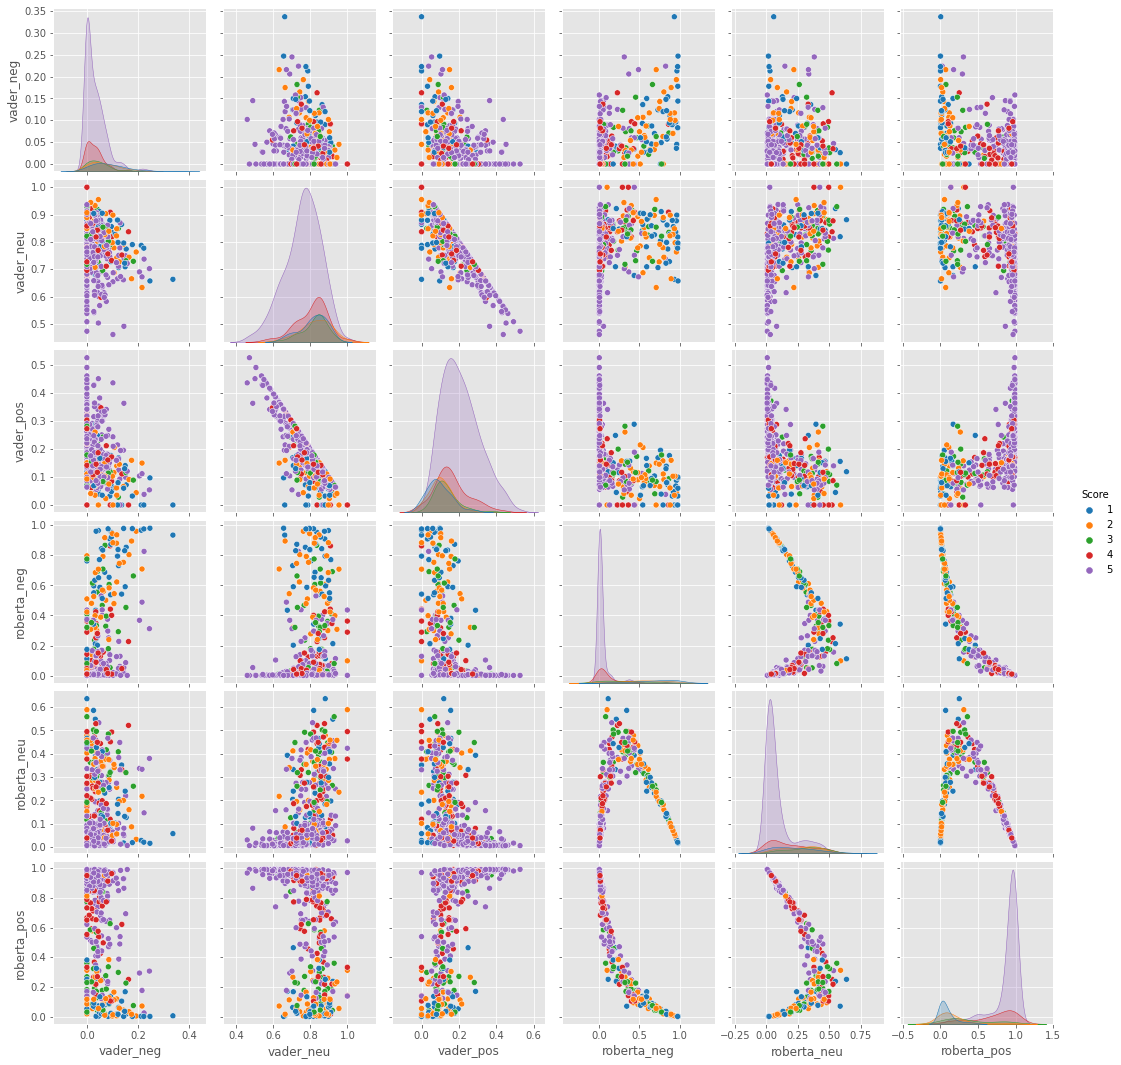

In [20]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()


error analysis

In [21]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,508972,0.057,0.850,0.093,0.9136,0.148610,0.307094,0.544295,B003SBU09Y,A2LAKVDDQYFYUA,Ryan M Connelly,2,2,5,1300838400,Awesome Replacement to Iced Coffee.,I have been purchasing Large French Vanilla Ic...
1,525374,0.091,0.909,0.000,-0.5559,0.863076,0.120021,0.016903,B001QY0SLU,A2EJ5XF26GV2F4,J Welch,1,1,4,1290902400,Very good,"I don't like homemade rum cakes, they have too..."
2,494340,0.000,0.779,0.221,0.5905,0.003829,0.012119,0.984052,B004OQBC8K,A3QLP6M4RIT77H,Snow Bound,1,1,5,1267228800,I'm in LOVE with this tea!,It is sinfully delicious and a nice way to end...
3,271686,0.066,0.830,0.104,0.5075,0.014087,0.088812,0.897101,B003CSUHXC,A233ZW18YNI3X5,"Barry Knudsen ""Just another Average Joe""",3,3,5,1297641600,These Wonderful-brand pistachios are truly won...,Although I haven't yet purchased Wonderful-bra...
4,351854,0.041,0.790,0.169,0.9691,0.014435,0.072945,0.912619,B003TDV3II,A36J3H8L314Y5V,jenny spam,0,0,5,1321833600,It makes my 2 year old runt Maltese filled out...,I have my pup at 8 month old and she stroke fo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,424629,0.036,0.818,0.146,0.9536,0.088866,0.258230,0.652904,B002HFPW6I,AKHZU1TWMWEJV,Kelly Simon,0,0,4,1334534400,I love these bars...,I love the Trio bars. I personally LIKE that ...
488,59800,0.000,0.718,0.282,0.8248,0.320771,0.448371,0.230858,B000LKTD84,A1BGZYFRB1GF0I,"F. Tay ""crunchy college student""",0,0,3,1328832000,Too bitter for dark chocolate lover,I enjoy full-bodied chocolate so I thought I'd...
489,353569,0.027,0.725,0.248,0.8679,0.006534,0.025651,0.967814,B000UVBYRM,A2KM58XHVRT4YQ,Charles Ojeda,0,0,5,1315094400,Post workout treats,I love these bars after a workout. When I don...
490,47851,0.045,0.955,0.000,-0.4767,0.708303,0.235572,0.056125,B004SRH2B6,A2552G2MTZSLXC,Matt Matt,1,1,2,1291852800,"Zico NOT SO ""premium"" 14oz","Taste is ok,reminds of the milk leftover in th..."


In [22]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0:10]

array(["I wanted to LOVE these but, I can't. Each type of veggie<br />CHIP should have its own NATURAL flavor..these have NO<br />FLAVOR. Greasy/sweet.<br /><br />I have cancelled my subscribe and save order.<br /><br />NOTE..I HAVE ORDERED SOME FRUIT AND VEGGIE CHIPS from<br /> ...nuts.com....I HOPE THEY ARE WHAT I AM LOOKING FOR !<br /><br />I will let you know.<br /><br />bbp okc ok 63<br /><br />*update may 13..my fruit and veggie chips from NUTS.<br />COM were no better.  I have decided I wll stick with<br />JUST TOMATOES..just veggie and fruit products...they<br />TASTE SO MUCH BETTER ! Another good company is<br />Harmony House..for dried vegs and fruit.",
       'I have eaten Dark Chocolate Toblerone before.  It is one of my favorites.  However, this chocolate was stale and had been frozen at some time - it had a whitish exterior to the bars.  Not just one bar, but all of them.  Amazon needs to take more care in selecting their supplier.',
       "Melina's White Truffle Oil, 2-

In [23]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0:10]

array(["I ordered three different kinds of Yogi tea based on the great reviews -- lemon ginger, stomach ease, and green tea super antioxident. Unfortunately, they all taste exactly the same -- like licorice. If you like licorice flavor, you'll like this tea. If you're looking for something that actually tastes like lemon and ginger, look elsewhere.",
       "I wanted to LOVE these but, I can't. Each type of veggie<br />CHIP should have its own NATURAL flavor..these have NO<br />FLAVOR. Greasy/sweet.<br /><br />I have cancelled my subscribe and save order.<br /><br />NOTE..I HAVE ORDERED SOME FRUIT AND VEGGIE CHIPS from<br /> ...nuts.com....I HOPE THEY ARE WHAT I AM LOOKING FOR !<br /><br />I will let you know.<br /><br />bbp okc ok 63<br /><br />*update may 13..my fruit and veggie chips from NUTS.<br />COM were no better.  I have decided I wll stick with<br />JUST TOMATOES..just veggie and fruit products...they<br />TASTE SO MUCH BETTER ! Another good company is<br />Harmony House..for

In [24]:
results_df.Text.sample(10)

145    My little dog, Lily loves these treats.  I lik...
443    I dont review often, but this stuff is just wh...
10     I prefer iced tea and I picked this tea up the...
62     This is seriously the ONLY food we have purcha...
90     When Italians order La Dolce Vita biscotti and...
461    In comparison to <a href="http://www.amazon.co...
285    It seems most of the organic/shade grown/fair ...
309    Use this product on Salmon and Halibut. Out of...
220    I didn't expect this to be so spicy! It smells...
188    Were they bigger when I was a kid or is it jus...
Name: Text, dtype: object

In [25]:
input = [
    {'id':1,'mentor_id':1,'feedback':''}
]

### Easy Pipeline

In [26]:
id          = [random.randint(1,3) for i in range(10)] 
mentor_id   = [random.randint(1,10) for i in range(10)] 
text        = [w for w in df.Text.sample(10)]
data_input = pd.DataFrame([id,mentor_id,text]).T
data_input.columns = ['id','mentor_id','text']

res = []
for i, row in tqdm(data_input.iterrows(), total=len(data_input)):
    print(f"Input Number {i}")
    res_dict = {}
    res_dict["id"] = row["id"]
    res_dict["mentor_id"] = row["mentor_id"]
    res_dict["text"] = row["text"]
    res.append(res_dict)
json_object = json.dumps(res, indent = 4) 
print(json_object)



  0%|          | 0/10 [00:00<?, ?it/s]

Input Number 0
Input Number 1
Input Number 2
Input Number 3
Input Number 4
Input Number 5
Input Number 6
Input Number 7
Input Number 8
Input Number 9
[
    {
        "id": 3,
        "mentor_id": 9,
        "text": "Really great tasting chips. I really did not expect them to be as hard as they were. Good if they are cover with a cheese sauce."
    },
    {
        "id": 1,
        "mentor_id": 2,
        "text": "Such an excellent source of fiber.  One of my favorite pastas to fix for salads as well as a side dish with entrees."
    },
    {
        "id": 1,
        "mentor_id": 10,
        "text": "I have been using Amazon to order K-cups for several months and am happy with the product, price and delivery. Thank you."
    },
    {
        "id": 3,
        "mentor_id": 7,
        "text": "First off this is NOT a toy, its a chew treat but what a great item.They are really hard and doggie loved it. He kept it as his new best buddy for 2 days. Saving the other 2 till he does something gr

In [27]:
data_input

,id,mentor_id,text
0,3,9,Really great tasting chips. I really did not e...
1,1,2,Such an excellent source of fiber. One of my ...
2,1,10,I have been using Amazon to order K-cups for s...
3,3,7,"First off this is NOT a toy, its a chew treat ..."
4,2,1,I prefer the Lavazza Supercrema. This is a goo...
5,1,1,My husband and I found the Lipton Diet Instant...
6,1,2,I bought mine at Central Market in Austin and ...
7,1,4,My last Pit Bull and the one I have now had TH...
8,3,4,I liked this toy when I first got it and it ke...
9,1,9,Crisp when chilled and refreshing without synt...
